In [2]:
import numpy as np
import pandas as pd

def calculate_dissimilarity(y_i, y_j, s_i, s_j):
    """Calculate the dissimilarity between two points."""
    return np.abs(y_j - y_i) / np.linalg.norm(s_j - s_i)

def agglomerative_spatial_clustering(y, s, K):
    """
    Perform the agglomerative spatial clustering algorithm.

    Parameters:
    y: Array of observations at each location
    s: Array of spatial locations
    K: Desired number of clusters

    Returns:
    clusters: List of clusters, where each cluster is a list of indices corresponding to the locations in that cluster.
    """
    N = len(y)
    clusters = [[i] for i in range(N)]  # Initialize each location as its own cluster

    for k in range(N - K):
        min_dissimilarity = float('inf')
        cluster_to_merge = None

        # Find the pair of clusters with the minimum dissimilarity
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for si in clusters[i]:
                    for sj in clusters[j]:
                        dissimilarity = calculate_dissimilarity(y[si], y[sj], s[si], s[sj])
                        if dissimilarity < min_dissimilarity:
                            min_dissimilarity = dissimilarity
                            cluster_to_merge = (i, j)

        # Merge the two clusters
        if cluster_to_merge is not None:
            i, j = cluster_to_merge
            if i < j:
                clusters[i].extend(clusters[j])
                clusters[j] = []
            else:
                clusters[j].extend(clusters[i])
                clusters[i] = []

        # Remove empty clusters
        clusters = [cluster for cluster in clusters if cluster]

    return clusters

# Read data from CSV files without headers, randomly picking 2000 rows
def read_data_from_csv(y_file_path, s_file_path, num_samples=200):
    y = pd.read_csv(y_file_path, header=None).sample(n=num_samples, random_state=42).values.flatten()
    s = pd.read_csv(s_file_path, header=None).sample(n=num_samples, random_state=42).values
    return y, s

# Example usage
file_path_s = '/home/panq/dev/blockVecchia/simu_ds/20ks_0.014290_2.500000/LOC_20000_univariate_matern_stationary_1'  # Replace with your actual file path
file_path_y = '/home/panq/dev/blockVecchia/simu_ds/20ks_0.014290_2.500000/Z1_20000_univariate_matern_stationary_1' 
y, s = read_data_from_csv(file_path_y, file_path_s)
K = 10  # Desired number of clusters

clusters = agglomerative_spatial_clustering(y, s, K)
# print("Final clusters:", clusters)


/tmp/ipykernel_49273/359654292.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(clusters))  # Get a color map with enough colors


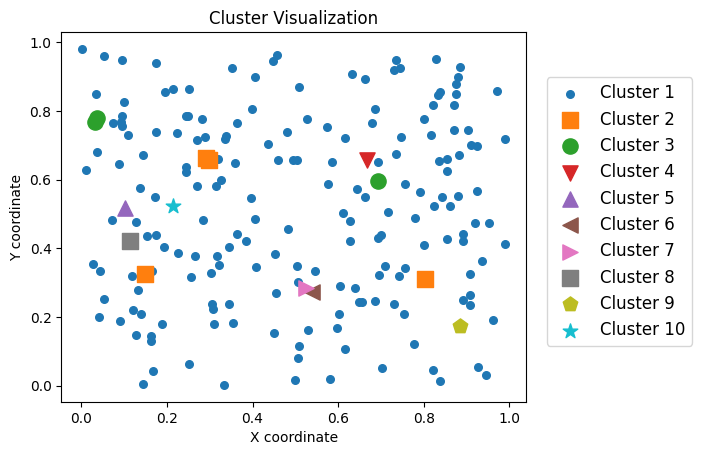

In [9]:
import matplotlib.pyplot as plt

def visualize_clusters(s, clusters):
    """Visualize the clusters."""
    colors = plt.cm.get_cmap('tab10', len(clusters))  # Get a color map with enough colors
    markers = ['.', ',', 'o', 'v', '^', '<', '>', 's', 'p', '*']

    fig = plt.figure(figsize=(6, 4.8))
    
    for idx, cluster in enumerate(clusters):
        cluster_points = s[cluster]  # Get the points belonging to the current cluster
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    color=colors(idx), 
                    s=120,
                    marker=markers[idx], 
                    label=f'Cluster {idx + 1}')

    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.title('Cluster Visualization')
    plt.legend(ncol = 1, fontsize=12, loc='upper center'
                        , bbox_to_anchor=(1.2, 0.9) )
                        # title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
    # legend.get_frame().set_alpha(1.)  # 50% transparency
    plt.savefig("./fig/heaton_cluster.pdf", bbox_inches='tight')
    plt.show()

visualize_clusters(s, clusters)